In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import edhec_risk_kit_111 as erk

In [3]:
ind = pd.read_csv("D:\Anh Nguyen\Anh's documents\Teaching Materials\Fin2\Codes\Portfolio optimisation\ind49_m_vw_rets.csv", header=0, index_col=0)/100
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
ind.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
1926-07,0.0237,0.0012,-0.9999,-0.0519,0.0129,0.0865,0.0250,0.5021,-0.0048,0.0808,...,0.0770,0.0194,-0.2379,0.0007,0.0187,0.0461,-0.0054,0.0289,-0.0485,0.0520
1926-08,0.0223,0.0268,-0.9999,0.2703,0.0650,0.1681,-0.0076,0.4298,-0.0358,-0.0251,...,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.1183,0.0257,0.0530,-0.0057,0.0676
1926-09,-0.0057,0.0158,-0.9999,0.0402,0.0126,0.0833,0.0642,-0.0491,0.0073,-0.0051,...,-0.0554,0.0006,-0.0787,0.0025,-0.0056,-0.0175,0.0072,-0.0306,-0.0314,-0.0386
1926-10,-0.0046,-0.0368,-0.9999,-0.0331,0.0106,-0.0140,-0.0509,0.0537,-0.0468,0.0012,...,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.1182,-0.0428,-0.0574,0.0207,-0.0849
1926-11,0.0675,0.0626,-0.9999,0.0729,0.0455,0.0000,0.0182,-0.0640,-0.0054,0.0187,...,0.0384,0.0160,0.0467,0.0652,0.0433,-0.0297,0.0358,0.0221,0.0492,0.0400


In [4]:
ind.columns

Index(['Agric', 'Food ', 'Soda ', 'Beer ', 'Smoke', 'Toys ', 'Fun  ', 'Books',
       'Hshld', 'Clths', 'Hlth ', 'MedEq', 'Drugs', 'Chems', 'Rubbr', 'Txtls',
       'BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach ', 'ElcEq', 'Autos', 'Aero ',
       'Ships', 'Guns ', 'Gold ', 'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm',
       'PerSv', 'BusSv', 'Hardw', 'Softw', 'Chips', 'LabEq', 'Paper', 'Boxes',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Banks', 'Insur', 'RlEst', 'Fin  ',
       'Other'],
      dtype='object')

In [5]:
ind.columns = ind.columns.str.strip()

In [6]:
ind.columns

Index(['Agric', 'Food', 'Soda', 'Beer', 'Smoke', 'Toys', 'Fun', 'Books',
       'Hshld', 'Clths', 'Hlth', 'MedEq', 'Drugs', 'Chems', 'Rubbr', 'Txtls',
       'BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach', 'ElcEq', 'Autos', 'Aero',
       'Ships', 'Guns', 'Gold', 'Mines', 'Coal', 'Oil', 'Util', 'Telcm',
       'PerSv', 'BusSv', 'Hardw', 'Softw', 'Chips', 'LabEq', 'Paper', 'Boxes',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Banks', 'Insur', 'RlEst', 'Fin',
       'Other'],
      dtype='object')

# Portfolio returns and risk

In [7]:
#Expected annualised returns
er = erk.annualize_rets(ind['2010':'2018'], 12)

<Axes: >

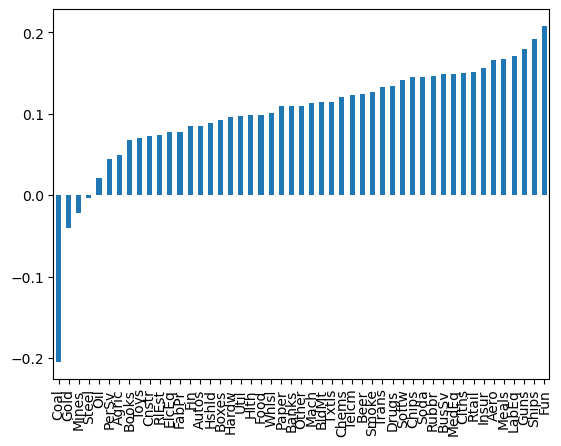

In [8]:
er.sort_values().plot.bar()

In [9]:
#Expected annualised covariance matrix
cov = ind['2010':'2018'].cov()*np.sqrt(12)

In [10]:
l = ['Food','Beer','Fun','Banks']

In [11]:
er[l]

Food     0.098755
Beer     0.124045
Fun      0.207718
Banks    0.109277
dtype: float64

In [12]:
cov.loc[l,l]

,Food,Beer,Fun,Banks
Food,0.003828,0.002584,0.002907,0.002330
Beer,0.002584,0.003686,0.001808,0.001955
Fun,0.002907,0.001808,0.016655,0.007231
Banks,0.002330,0.001955,0.007231,0.009461


In [13]:
#Create an equally weighted portfolio
ew_weights = np.repeat(0.25,4)
ew_weights

array([0.25, 0.25, 0.25, 0.25])

In [14]:
erk.portfolio_return(ew_weights, er[l])

0.13494901110974478

In [15]:
erk.portfolio_vol(ew_weights, cov.loc[l,l])

0.0667363854979013

# The 2-asset case
This is a very simple case as the weights of the second asset is simly 1 - weight of the 1st asset.

In [16]:
l = ['Food','Fun']

In [17]:
n_points = 21
weights =[np.array([w,1-w]) for w in np.linspace(-0.5,1.5,n_points)]

In [18]:
rets = [erk.portfolio_return(w,er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l,l]) for w in weights]
ef = pd.DataFrame({'Returns': rets, 'Volatility': vols})

<Axes: xlabel='Volatility', ylabel='Returns'>

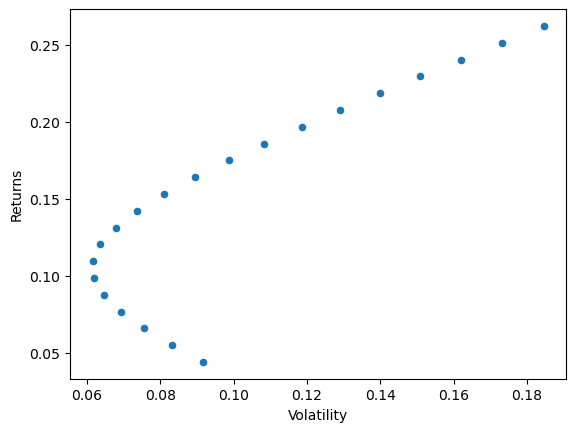

In [19]:
ef.plot.scatter(x="Volatility",y="Returns")

# Multiple assets (No risk free rate)

In [20]:
l = ['Food','Beer','Fun','Banks']

In [21]:
weights15 = erk.minimize_vol(0.15, er[l], cov.loc[l,l])
weights15

array([2.77555756e-17, 6.89809053e-01, 3.10190947e-01, 0.00000000e+00])

In [22]:
print(f"{'Assets':<15}{'Optimal Weights'}")
for ticker,weight in zip(l,weights15):
    print(f'{ticker:<8}:{"":<5}{weight*100:>10,.2f}%')

Assets         Optimal Weights
Food    :           0.00%
Beer    :          68.98%
Fun     :          31.02%
Banks   :           0.00%


In [23]:
erk.portfolio_return(weights15,er[l])

0.14999999985817009

In [24]:
erk.portfolio_vol(weights15,cov.loc[l,l])

0.06426476009278215

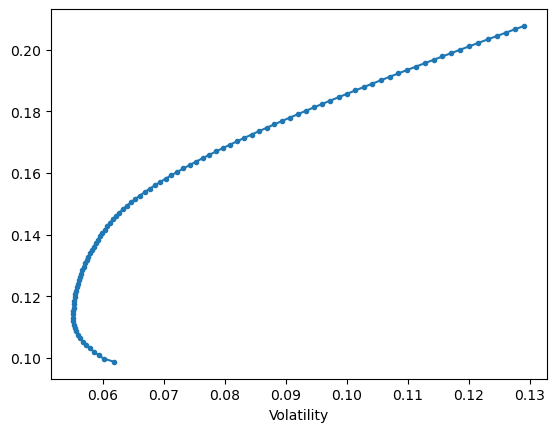

In [25]:
erk.plot_ef(100, er[l], cov.loc[l,l])

# With a risk free rate

In [27]:
#Determine the tangency portfolio
weights_tangency = erk.msr(0.05, er[l], cov.loc[l,l])
print(f"{'Assets':<15}{'Optimal Weights of the Tangency portfolio'}")
for ticker,weight in zip(l,weights_tangency):
    print(f'{ticker:<8}:{"":<5}{weight*100:>10,.2f}%')

Assets         Optimal Weights of the Tangency portfolio
Food    :           0.00%
Beer    :          67.94%
Fun     :          32.06%
Banks   :           0.00%


In [30]:
return_tangency = erk.portfolio_return(weights_tangency,er[l])
vol_tangency = erk.portfolio_vol(weights_tangency,cov.loc[l,l])
print(f'The optimal tangency portfolio has an expected returns of \
{return_tangency*100:.2f}% and a volatility of {vol_tangency*100:.2f}%.')

The optimal tangency portfolio has an expected returns of 15.09% and a volatility of 6.48%.


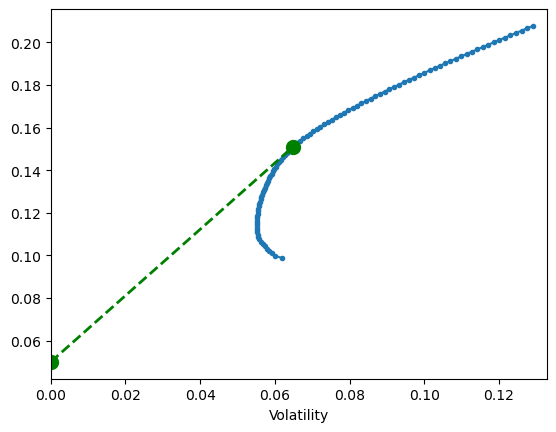

In [31]:
erk.plot_ef(100, er[l], cov.loc[l,l], style='.-', legend=False, show_cml=True, riskfree_rate=0.05)

In [33]:
#Determine the GMV porfolio
weights_gmv = erk.gmv(cov.loc[l,l])
print(f"{'Assets':<15}{'Optimal Weights of the GMV portfolio'}")
for ticker,weight in zip(l,weights_gmv):
    print(f'{ticker:<8}:{"":<5}{weight*100:>10,.2f}%')

Assets         Optimal Weights of the GMV portfolio
Food    :          38.52%
Beer    :          48.63%
Fun     :           1.17%
Banks   :          11.68%


In [34]:
return_gmv = erk.portfolio_return(weights_gmv,er[l])
vol_gmv = erk.portfolio_vol(weights_gmv,cov.loc[l,l])
print(f'The optimal GMV portfolio has an expected returns of \
{return_gmv*100:.2f}% and a volatility of {vol_gmv*100:.2f}%.')

The optimal GMV portfolio has an expected returns of 11.36% and a volatility of 5.51%.


<Axes: xlabel='Volatility'>

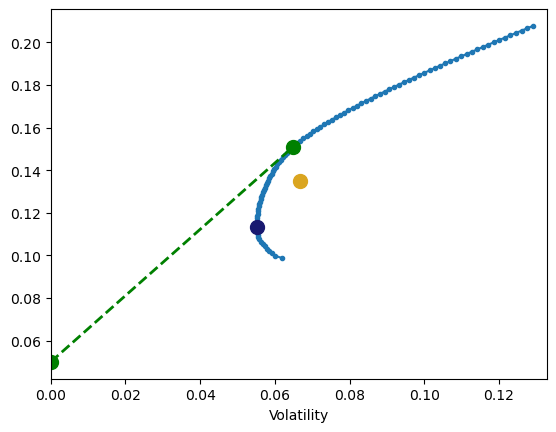

In [35]:
erk.plot_ef(100, er[l], cov.loc[l,l], style='.-', legend=False, show_cml=True, riskfree_rate=0.05, show_ew=True, show_gmv=True)

In [36]:
#Determine optimal portfolio with a target of return of 20% and no rf
weights20 = erk.minimize_vol(0.2, er[l], cov.loc[l,l])
print(f"{'Assets':<15}{'Optimal Weights, r = 20%, no rf'}")
for ticker,weight in zip(l,weights20):
    print(f'{ticker:<8}:{"":<5}{weight*100:>10,.2f}%')

Assets         Optimal Weights, r = 20%, no rf
Food    :           0.00%
Beer    :           9.22%
Fun     :          90.78%
Banks   :           0.00%


In [47]:
return_20 = erk.portfolio_return(weights20,er[l])
vol_20 = erk.portfolio_vol(weights20,cov.loc[l,l])
vol_20

0.1185664564151761

In [37]:
def msr_target_return(target_return, riskfree_rate, er, cov):
    """
    Returns the weights of the portfolio that gives you the maximum sharpe ratio
    given the riskfree rate, target return and expected returns and a covariance matrix
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
    # construct the constraints
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    def neg_sharpe(weights, riskfree_rate, er, cov):
        """
        Returns the negative of the sharpe ratio
        of the given portfolio
        """
        r = erk.portfolio_return(weights, er)
        vol = erk.portfolio_vol(weights, cov)
        return -(r - riskfree_rate)/vol
    
    tangency_weights = minimize(neg_sharpe, init_guess,
                       args=(riskfree_rate, er, cov), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,),
                       bounds=bounds)
    tangency_weights = tangency_weights.x
    tangency_return = erk.portfolio_return(tangency_weights,er)
    p_weights = (target_return - riskfree_rate)/(tangency_return - riskfree_rate)
    asset_weights = p_weights * tangency_weights
    return asset_weights

In [39]:
from scipy.optimize import minimize
weights20rf=msr_target_return(0.2, 0.05, er[l], cov.loc[l,l])
print(f"{'Assets':<15}{'Optimal Weights, r = 20%, no rf'}")
for ticker,weight in zip(l,weights20rf):
    print(f'{ticker:<8}:{"":<5}{weight*100:>10,.2f}%')

Assets         Optimal Weights, r = 20%, no rf
Food    :           0.00%
Beer    :         101.04%
Fun     :          47.67%
Banks   :           0.00%


In [40]:
#Double check!
return_20_rf = weights20rf.sum()*return_tangency + (1-weights20rf.sum())*0.05
return_20_rf

0.20000000000000004

In [44]:
vol_20_rf = weights20rf.sum()*vol_tangency
print(f'The optimal portfolio, target r = 20% with rf has an expected returns \
of {return_20_rf*100:.2f}% and a volatility of {vol_20_rf*100:.2f}%.')

The optimal portfolio, target r = 20% with rf has an expected returns of 20.00% and a volatility of 9.64%.


In [48]:
print(f'The optimal portfolio, target r = 20% with no rf has an expected returns \
of {return_20*100:.2f}% and a volatility of {vol_20*100:.2f}%.')

The optimal portfolio, target r = 20% with no rf has an expected returns of 20.00% and a volatility of 11.86%.
